In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
dataset = pd.read_csv('city_happinessIndex.csv')
X = dataset.drop(['City', 'Month', 'Year'], axis=1)

In [36]:
missing = dataset.isnull().sum()
print("Missing data\n", missing)

Missing data
 City                    0
Month                   0
Year                    0
Decibel_Level           0
Traffic_Density         0
Green_Space_Area        0
Air_Quality_Index       0
Happiness_Score         0
Cost_of_Living_Index    0
Healthcare_Index        0
dtype: int64


In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Traffic_Density'])], remainder='passthrough')
X= np.array(ct.fit_transform(X))

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

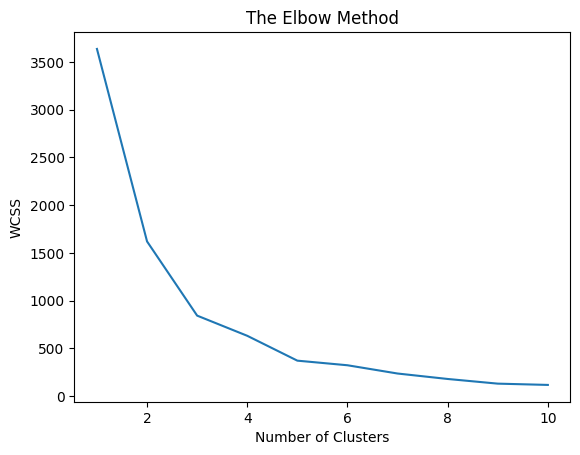

In [40]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)
dataset['Cluster'] = y_kmeans

[4 4 4 4 4 3 4 4 1 3 4 4 4 1 3 1 4 3 1 4 4 4 4 4 3 3 3 4 4 3 4 3 3 3 3 4 4
 4 4 4 4 1 4 4 1 4 4 4 4 4 4 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3
 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3
 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3
 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3
 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2
 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 0 3 2 3
 0 3 2 3 0 3 2 3 0 3 2 3 0 0 2 3 0 0 2 3 0 0 2 3 0 0 2 0 0 0 2 0 0 0 2 0 0
 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0
 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2
 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0
 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0
 2 0 0 0 2 0 0 0 2 0 0 0 

In [42]:
cluster_summary = dataset.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

                Year  Decibel_Level  Green_Space_Area  Air_Quality_Index  \
Cluster                                                                    
0        2027.434783      53.236715       1738.550725          24.903382   
1        2024.000000      79.800000         17.200000         175.800000   
2        2026.439655      60.000000       1260.000000          35.000000   
3        2024.865031      53.496933        513.895706          26.012270   
4        2024.000000      66.176471         37.941176          84.705882   

         Happiness_Score  Cost_of_Living_Index  Healthcare_Index  
Cluster                                                           
0             -81.713043             23.236715         97.019324  
1               3.816000             47.600000         53.200000  
2             -53.330172             20.517241         95.000000  
3             -10.169939             33.466258         96.331288  
4               6.220588             81.323529         76.382353 

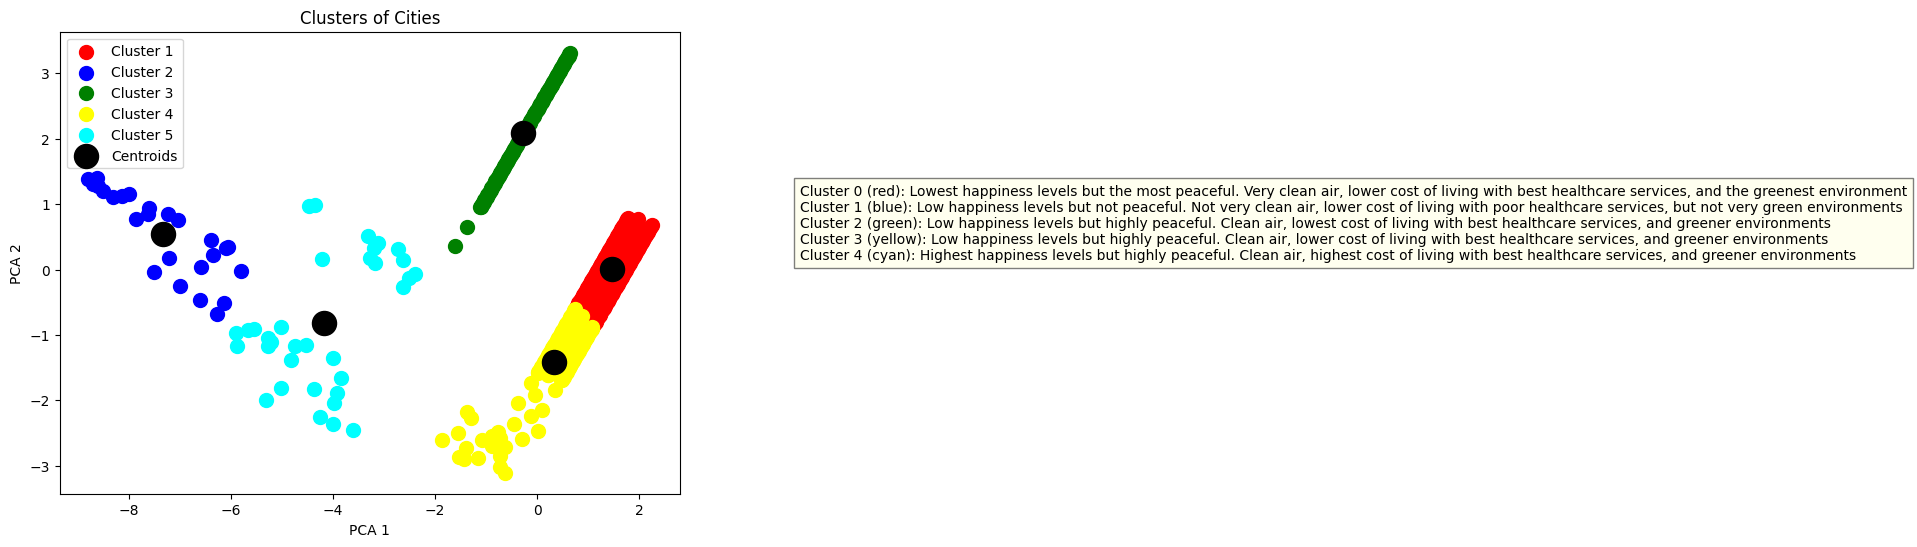

In [43]:

plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], c='red', s=100, label='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], c='blue', s=100, label='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], c='green', s=100, label='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], c='yellow', s=100, label='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], c='cyan', s=100, label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=300, label='Centroids')
plt.title('Clusters of Cities')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
descriptions = [
    "Cluster 0 (red): Lowest happiness levels but the most peaceful. Very clean air, lower cost of living with best healthcare services, and the greenest environment",
    "Cluster 1 (blue): Low happiness levels but not peaceful. Not very clean air, lower cost of living with poor healthcare services, but not very green environments",
    "Cluster 2 (green): Low happiness levels but highly peaceful. Clean air, lowest cost of living with best healthcare services, and greener environments",
    "Cluster 3 (yellow): Low happiness levels but highly peaceful. Clean air, lower cost of living with best healthcare services, and greener environments",
    "Cluster 4 (cyan): Highest happiness levels but highly peaceful. Clean air, highest cost of living with best healthcare services, and greener environments"
]

textstr = "\n".join(descriptions)
plt.gcf().text(1.05, 0.5, textstr, fontsize=10, bbox=dict(facecolor='lightyellow', alpha=0.5))
plt.show()